# Лабораторная 1.1

## Задание 1
Разберите фрагмент алгоритма и реализуйте его на языке Python.  
Проверьте работу сети для входов `I1=1, I2=0` и весов `w1=0.45, w2=0.78, w3=-0.12, w4=0.13, w5=1.5, w6=-2.3`.


In [1]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# входы
I1, I2 = 1, 0

# веса
w1, w2, w3, w4, w5, w6 = 0.45, 0.78, -0.12, 0.13, 1.5, -2.3

# скрытый слой
H1input = I1 * w1 + I2 * w3
H1output = sigmoid(H1input)

H2input = I1 * w2 + I2 * w4
H2output = sigmoid(H2input)

# выходной слой
O1input = H1output * w5 + H2output * w6
O1output = sigmoid(O1input)

# целевое значение (xor)
O1ideal = 1
error = (O1ideal - O1output) ** 2

H1input, H1output, H2input, H2output, O1input, O1output, error


(0.45,
 0.610639233949222,
 0.78,
 0.6856801139382539,
 -0.6611054111341508,
 0.34049134000389103,
 0.4349516726098633)

## Задание 2
Подберите веса для более точного приближения функции XOR для всех четырёх наборов входов.

| I1 | I2 | XOR |
|----|----|-----|
| 0  | 0  |  0  |
| 0  | 1  |  1  |
| 1  | 0  |  1  |
| 1  | 1  |  0  |

In [3]:
import itertools

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def xor_network(I1, I2, w11, w12, b1, w21, w22, b2, w31, w32, b3):
    H1 = sigmoid(I1 * w11 + I2 * w12 + b1)
    H2 = sigmoid(I1 * w21 + I2 * w22 + b2)
    O  = sigmoid(H1 * w31 + H2 * w32 + b3)
    return O

def check_xor_results(w11, w12, b1, w21, w22, b2, w31, w32, b3):
    inputs = list(itertools.product([0,1],[0,1]))
    results = []
    for I1, I2 in inputs:
        out = xor_network(I1, I2, w11, w12, b1, w21, w22, b2, w31, w32, b3)
        results.append((I1, I2, round(out,3)))
    return results

In [4]:
w11, w12, b1 = 10, 10, 0
w21, w22, b2 = -10, -10, 0
w31, w32, b3 = 15, -15, 0

results1 = check_xor_results(w11, w12, b1, w21, w22, b2, w31, w32, b3)
results1

[(0, 0, 0.5), (0, 1, 1.0), (1, 0, 1.0), (1, 1, 1.0)]

## Задание 3
Используя нейрон смещения, подберите веса для более точного приближения <исключающего или> всего набора из четырех тренировочных сетов (можно использовать заданную трехслойную сеть или рассмотреть упрощенную двухслойную сеть).


In [5]:
w11, w12, b1 = 6.804, 6.682, -3.025
w21, w22, b2 = 4.824, 4.795, -7.377
w31, w32, b3 = 10.304, -11.018, -4.793

results2 = check_xor_results(w11, w12, b1, w21, w22, b2, w31, w32, b3)
results2

[(0, 0, 0.013), (0, 1, 0.989), (1, 0, 0.989), (1, 1, 0.012)]

# Задание 4 (для специальности ПИ).
Заданы координаты пяти точек на плоскости:

(1, 5), (7, 4), (5, 2), (7, 5), (4, 7).

Задано число кластеров: 2. 

Проведите кластеризацию методом K-means. Выполните две итерации. 

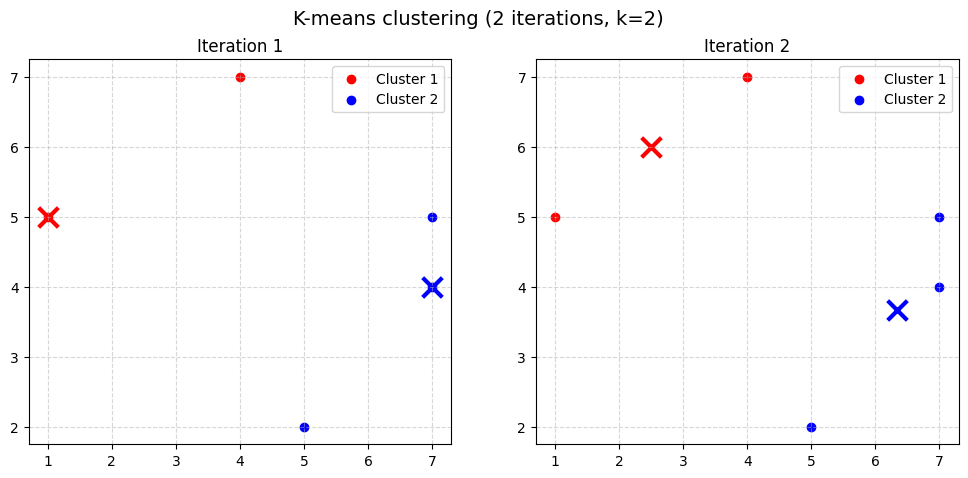

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
points = np.array([
    [1, 5],
    [7, 4],
    [5, 2],
    [7, 5],
    [4, 7]
])

# Количество кластеров
k = 2

# Фиксируем начальные центроиды (первые две точки)
centroids = points[:k].astype(float)

# Цвета для кластеров
colors = ["red", "blue", "green", "purple", "orange"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for iteration in range(2):
    # Шаг 1: назначение точек ближайшему центроиду
    distances = np.linalg.norm(points[:, None, :] - centroids[None, :, :], axis=2)
    labels = np.argmin(distances, axis=1)

    # Шаг 2: пересчёт центроидов
    new_centroids = np.array([
        points[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
        for j in range(k)
    ])

    # Визуализация
    ax = axes[iteration]
    for j in range(k):
        cluster_points = points[labels == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[j], label=f"Cluster {j+1}")
        ax.scatter(centroids[j, 0], centroids[j, 1], c=colors[j], marker="x", s=200, linewidths=3)
    
    ax.set_title(f"Iteration {iteration+1}")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.5)

    centroids = new_centroids

plt.suptitle("K-means clustering (2 iterations, k=2)", fontsize=14)
plt.show()
